In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 1차원 이산형 확률변수
이산형 확률변수는 취할 수 있는 값이 이산적인 확률변수이다.

### 1차원 이산형 확률변수의 정의

#### 확률질량함수

이산형 확률변수일 때 확률변수 X가 취할 수 있는 값에 대한 집합을 ${x_{1},x_{2},...}$ 로, 확률변수 x가 $x_{k}$라는 값을 취하는 확률을

$P(X=x_{k})=p_{k} (k=1,2,...)$

로 정의할 수 있다

이때 확률은 변수가 취할 수 있는 값 x를 인수로 하는 함수로 볼 수 있기 때문에

$f(x)=P(X=x)$

로 하는 함수 f(x)를 생각할 수 있고, 이를 **확률질량함수(probability mass function,PMF) 또는 확률함수** 라고 부른다

확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응을 **확률분포(probability distribution)** 라고 한다.

따라서 확률변수의 확률분포가 결정되면 그 확률변수의 움직임이 정해진다

In [2]:
# 주사위의 눈을 정의한다
x_set = np.array([1,2,3,4,5,6])

불공정한 주사위의 확률분포가 1/21,2/21 ... 으로 정해져 있다면 불공정한 주사위의 확률 변수는 다음과 같이 정의할 수 있다

$$ f(x)= \left\{
    \begin{array}\\
        \frac{x}{21} &  (x \in {1,2,3,4,5,6}) \\
        0 & \mbox{otherwise}
    \end{array}
\right.$$

In [3]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 확률분포이다. 이 확률분포에 의해 확률변수 X의 동작이 결정된다.

따라서 X는 x_set과 f를 요소로 하는 리스트로 구현된다

In [4]:
X = [x_set,f]

In [5]:
prob = np.array([f(x_k) for x_k in x_set])

dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

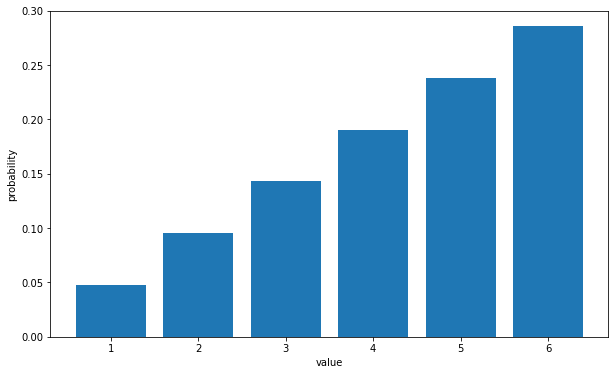

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

#### 누적분포함수

확률함수는 확률변수 X가 x가 될 때의 확률을 반환하는 함수이지만, 확률변수 X가 x 이하가 될 때의 확률을 반환하는 함수로도 사용된다

이와 같은 함수 F(x)를 **누적분포함수(cumulative distribution function,CDF)** 또는 간단히 **분포함수** 라 하고, 다음과 같이 정의한다

$$F(x) = P(X\leq x) = \sum_{x_{k}\leq x}{f(x_{k})}$$

In [7]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [8]:
F(3)

0.2857142857142857

### 1차원 이산형 확률변수의 지표

#### 기댓값

확률변수의 평균은 확률변수를 몇 번이나 (무제한으로) 시행하여 얻어진 실현값의 평균을 가리킨다

무제한으로 시행할 수 없기 대문에 이산형 확률변수의 경우, 확률변수의 평균은 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합으로 정의된다.

$$E(X) = \sum_{k}{x_{k}f(x_{k})}$$

확률변수의 평균은 **기댓값(expected value)** 라고도 부른다

기호로는 $\mu$나 E(X)라는 표기를 주로 사용한다

In [9]:
# 불공정한 주사위
np.sum([x_k* f(x_k) for x_k in x_set])

4.333333333333333

앞에서 설명했듯이, 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균이다

무제한 시행은 불가능하기 때문에 100만번 주사위를 굴려 나온 평균과 비교해 보자

In [10]:
sample = np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.334982

### 이산형 확률변수의 기댓값

$$E(g(X)) = \sum_{k}{g(x_{k})f(x_{k})}$$

### 기댓값의 선형성

a,b를 실수, X를 확률변수로 했을 때

$$E(aX + b) = aE(X) + b$$

#### 분산

확률변수의 분산도 데이터의 분산과 마찬가지로 산포도를 나타내는 지표가 된다

이산형 확률변수의 경우, 분산은 다음 식과 같이 편차 제곱의 기댓값으로 정의된다.

여기서 $\mu$는 확률변수 X의 기댓값으로 E(X)이다.

$$V(X) = \sum_{k}{(x_{k}-\mu)^{2}f(x_{k})}$$

분산은 기호로 $\sigma$를 사용하고 $\sigma^{2}$이나 V(X)로 흔히 표기한다.

다만, $\sigma$는 확률변수 X의 표준편차를 나타낸다

In [11]:
# 확률변수의 기댓값 구하는 함수
# 변환한 확률변수의 기댓값도 구할 수 있음
def E(X,g=lambda x:x):
    x_set,f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
# 확률변수의 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [12]:
# 확률변수의 분산 구하는 함수
# 변환한 확률변수의 분산도 구할 수 있음
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

## 2차원 이산형 확률변수
2개의 불공정한 주사위를 사용한다

### 2차원 이산형 확률변수의 정의

#### 결합확률분포
2차원 확률변수에서는 1차원 확률분포 2개를 동시에 다룬다(X,Y)

또한 확률변수의 움직임은 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의해 정해진다

즉 (X,Y)가 취할 수 있는 값의 조합으로 이루어진 집합을

$$\{ (x_{i},y_{y})|i=1,2,...;j=1,2,... \}$$

라고 하면 확률은 X와 Y가 각각 취할 수 있는 값의 조합에 관해서 정의할 수 있고, 확률변수 X가 $x_{i}$, 확률변수 Y가 $y_{j}$를 취하는 확률은

$$P(X=x_{i}, Y = y_{j}  (i=1,2,...;j=1,2,...)$$

라고 나타낼 수 있다

이와같이 확률변수 (X,Y)의 움직임을 동시에 고려한 분포를 **결합확률분포(joint probability distribution)**  또는 **결합분포** 라고 한다




지금껏 했던 것처럼 불공정한 주사위 X,Y로 했을 때에는 공분산이 0이 나오기 때문에(무관계) A의 눈과 B의 눈을 더한것을 X, A의 눈을 Y로한 2차원 확률분포를 생각해 본다

$$P(X=x,Y=y) = f_{XY}(x,y)$$

를 만족하는 함수 $f_{XY}(x,y)$ 를 **결합확률함수(joint probability function)** 라고 한다

이 경우 결합확률함수는

$$f_{XY}(x,y) = \left\{
            \begin{array} \\
                \frac{y(x-y)}{441} & (y\in \{1,2,3,4,5,6\},x-y\in\{1,2,3,4,5,6\}) \\
                0 & \mbox{otherwise}
            \end{array}
        \right.$$

#### 확률의 성질

2차원 이산형 확률변수도 1차원의 경우와 마찬가지로 확률은 반드시 0 이상이어야 하며 전체 확률은 1이 되어야 한다.

따라서 2차원 이산형 확률변수는 확률의 성질로서 다음 두 가지 식을 만족해야 한다

$$f_{XY}(X-{i},y_{j}) \geq 0$$

$$\sum_{i}\sum_{j}f_{XY}(X-{i},y_{j}) = 1$$

In [13]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [14]:
# 결합확률함수
def f_XY(x,y):
    if 1<= y <=6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

# 확률변수 (X,Y)의 움직임을 결정하는 요소들로 구성된 리스트
XY = [x_set,y_set,f_XY]

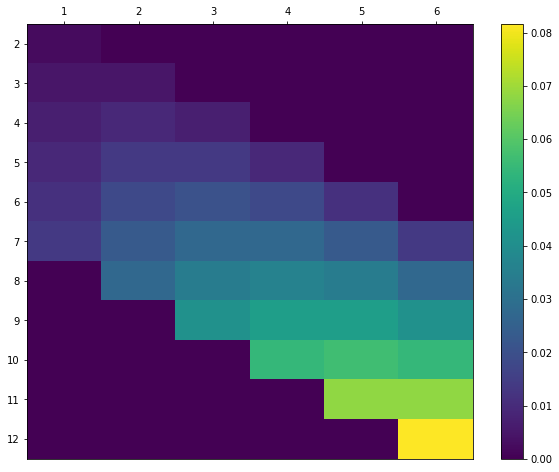

In [15]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [16]:
# 확률의 성질
# 모든 확률은 0 이상이고, 모든 확률의 합은 1
np.all(prob >= 0)

True

In [17]:
np.sum(prob)

1.0

#### 주변확률분포

확률변수(X,Y)는 결합확률분포에 의해 동시에 정의되지만, 개별 확률변수에만 흥미가 있을 수 있다.

예를 들면, 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 알고 싶은 상황

이럴 때 확률변수 X의 확률함수$f_{X}(x)$는 결합확률함수 $f_{XY}$에서 Y가 취할 수 있는 값 모두를 대입한 다음 모두 더한

$$f_{X}(x) = \sum_{k}{f_{XY}(x,y_{k})}$$

로 구할 수 있다.

이와 같이 얻은 $f_{X}(x)$를 X의 **주변확률분포(marginal probability distribution)** 이라 하고, 간단히 X의 **주변분포** 라고도 표현한다

In [18]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [20]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

주변분포를 구해보면, X와 Y를 각각 독립이라고 생각할 수 있다

In [24]:
X = [x_set, f_X]
Y = [y_set,f_Y]

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

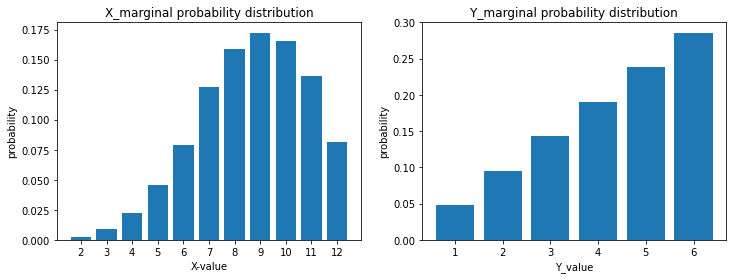

In [25]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X-value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률변수의 지표

#### 기댓값

X의 기댓값

$$\mu_{X} = E(X) = \sum_{i}\sum_{j}{x_{i}f_{XY}(x_{i},y_{i})}$$

In [ ]:
np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

X,Y의 함수 $g(X,Y)$의 기댓값을 정의하면

$$E(g(X,Y)) = \sum_{i}\sum_{j}{g(x_{i},y_{i})f_{XY}(x_{i},y_{i})}$$

In [28]:
def E(XY,g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [29]:
mean_X = E(XY,lambda x, y : x)
mean_X

8.666666666666666

In [30]:
mean_Y = E(XY, lambda x, y : y)
mean_Y

4.333333333333333

기댓값에는 선형성이 있다.

그것은 확률변수가 2차원이 되더라도 마찬가지

$$E(aX + bY) = aE(X) + bE(Y)$$

In [31]:
a,b = 2,3

In [32]:
E(XY, lambda x,y : a*x + b*y)

30.333333333333332

In [33]:
a*mean_X + b*mean_Y

30.333333333333332

#### 분산

$$\sigma_{X}^{2} = V(X) = \sum_{i}\sum_{j}{(x_{i} - \mu_{X})^{2}f_{XY}(x_{i},y_{j})}$$

In [36]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

일반적으로 X와 Y의 함수 g(X,Y)의 분산을 구할 수 있고, 수식은 다음과 같다

$$V(g(X,Y)) = \sum_{i}\sum_{j}(g(x_{i},y_{j}) - E(g(X,Y)))^{2}f_{XY}(x_{i},y_{j})$$

In [37]:
def V(XY,g):
    x_set,y_set,f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [40]:
var_X = V(XY, g=lambda x, y : x)
var_X

4.444444444444444

In [41]:
var_Y = V(XY, g=lambda x, y : y)
var_Y

2.2222222222222223

#### 공분산

공분산을 사용하여 2개의 확률변수 X,Y 사이에 어느 정도 상관이 있는지 알 수 있다

$$\sigma_{XY} = Cov(X,Y) = \sum_{i}\sum_{j}{(x_{i} - \mu_{X})(y_{j} - \mu_{Y})f_{XY}(x_{i},y_{j})}$$

In [44]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [45]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

분산과 공분산에 관해서는 다음 공식이 성립한다

a,b를 실수, X, Y를 확률변수로 했을 때

$$V(aX + bY) = a^{2}V(X) + b^{2}V(Y) + 2abCov(X,Y)$$

가 성립

In [46]:
# V(2X + 3Y) = 4V(X) + 9V(Y) + 12Cov(X, Y)를 확인해 보자

V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [47]:
a**2*var_X + b**2*var_Y + 2*a*b * cov_xy

64.44444444444443

#### 상관계수

확률변수의 상관계수는 데이터의 상관계수와 마찬가지로 공분산을 각가의 표준편차로 나누어 구한다.

상관계수의 기호는 $\rho$를 사용한다

$$\rho_{XY} = \rho(X,Y) = \frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}$$

In [ ]:
cov_xy = np.sqr